# Analysis_1    
## This analysis is about the probability of successfully scoring from 45 meters(soccer)
## Using cl-shots-2012.csv

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [22]:
# using the first column as index
raw_data = pd.read_csv('..\data\cl-shots-2012.csv',index_col=0,na_values='N/A')
raw_data.head()

,dist,dx,dy,event_id,goal,play_id,player,shot,team,x,y
0,28.989564,28.245,6.528,4fc58cdd-544b-4c05-8b2f-1cdc3d5a8164,False,699caaab-f4d6-411c-b7ef-737ec6d23196,James Rodríguez,True,Porto,76.755,28.832
2,19.254175,-18.585,5.032,764b87c7-426b-45da-9921-9e0556b90922,False,373c02f2-81ff-4b46-b2df-16629800c8fb,Sammir,True,Dinamo Zagreb,18.585,27.404
8,25.772814,-20.790,-15.232,a276c188-492e-4ada-8168-5bee7e998cc7,False,e190760e-9912-4d36-99f7-a1ceb696b5da,Duje Čop,True,Dinamo Zagreb,20.790,48.280
10,35.180567,33.810,-9.724,b5f9dd79-14ff-4671-ad3a-a198abfa24a8,False,1204aee1-6925-48b1-92af-d70fa87b888f,Maicon,True,Porto,71.190,44.200
12,13.755000,13.755,0.000,3a0178d9-67c8-4018-b18e-cceb3fbbdf48,False,a968c9e5-6f17-48ab-9081-7210ce10b3ed,Miguel Lopes,True,Porto,91.245,38.012


In [23]:
raw_data.describe()

,dist,dx,dy,x,y
count,2273.000000,2271.000000,2271.000000,2273.000000,2273.000000
mean,18.387649,0.124696,0.842978,51.402604,33.157404
std,8.120749,17.499210,9.879692,38.015387,9.182643
min,0.000000,-47.145000,-42.160000,0.000000,2.856000
25%,11.872038,-13.387500,-6.154000,13.020000,26.384000
50%,17.511139,-2.205000,0.680000,33.075000,33.320000
75%,24.382473,14.280000,8.092000,90.300000,40.324000
max,54.922115,54.915000,34.204000,105.000000,63.444000


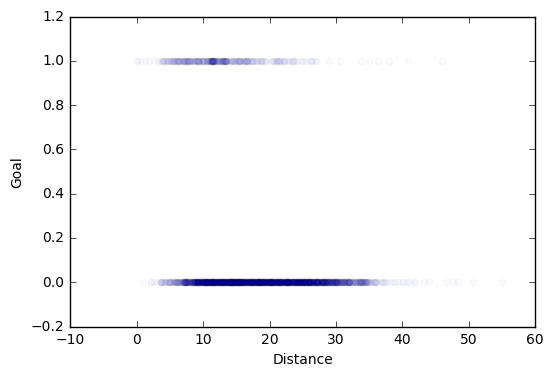

In [30]:
#This scatter can detect whether having wrong data 
plt.scatter(raw_data.dist,raw_data.goal,alpha=0.02)
plt.xlabel('Distance')
plt.ylabel('Goal')

In [41]:
#for showing better,need to calculate the probability of shoting at the same distance
#so divide the distance into 20 sections
bins = np.linspace(raw_data.dist.min(),raw_data.dist.max(),20)
# to group according to whether in the same section
groups = raw_data.groupby(np.digitize(raw_data.dist,bins))
#for showing better,need to calculate the probability of shoting at the same section
final_data = groups[['dist','goal']].mean()

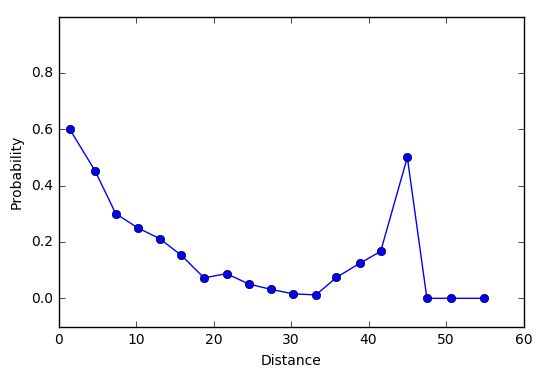

In [57]:
plt.plot(final_data.dist,final_data.goal,'bo-')
plt.ylim(-0.1,1)
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.savefig('ana_1.png')